In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/3. loan_data_merged.csv', on_bad_lines = 'skip')

df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42062,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42063,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42064,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


## Checking outliers using IQR

In [ ]:
outliers_index = set()

for i in df.select_dtypes(include = 'number').columns[1:].tolist():

   Q3 = df[i].quantile(0.75)
   Q1 = df[i].quantile(0.25)

   IQR = Q3 - Q1

   upper_limit = Q3 + 1.5 * IQR
   lower_limit = Q1 - 1.5 * IQR


   outliers_index.update(df[(df[i] < lower_limit) | (df[i] > upper_limit)].index.tolist())

In [ ]:
len(outliers_index)

37306

In [ ]:
np.round(df['Total_TL'].describe())

,Total_TL
count,42066.0
mean,5.0
std,7.0
min,1.0
25%,1.0
50%,3.0
75%,6.0
max,235.0


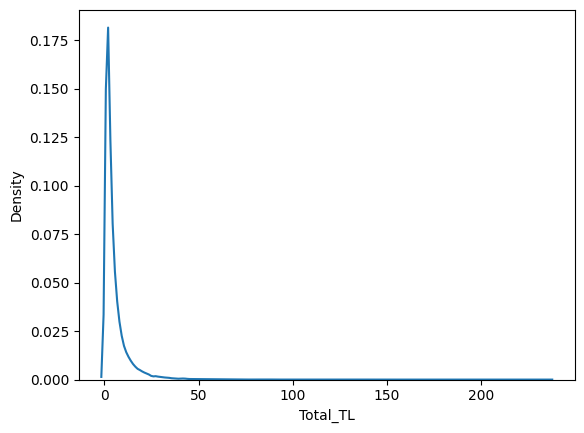

In [ ]:
sns.kdeplot(df['Total_TL'])
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
kurt = df['Total_TL'].kurtosis()

skewness = df['Total_TL'].skew()

print(skewness,kurt)

# The Kurtosis value is approximately 15.76. A kurtosis value greater than 3 indicates a distribution with heavier tails which means high density of outliers compared to a normal distribution


5.498451969843868 61.958041234866215


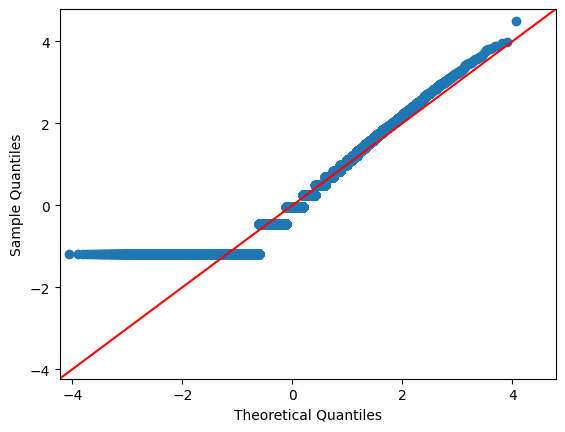

In [ ]:
sm.qqplot(np.log(df['Total_TL']), fit = True, line = '45')
plt.show()

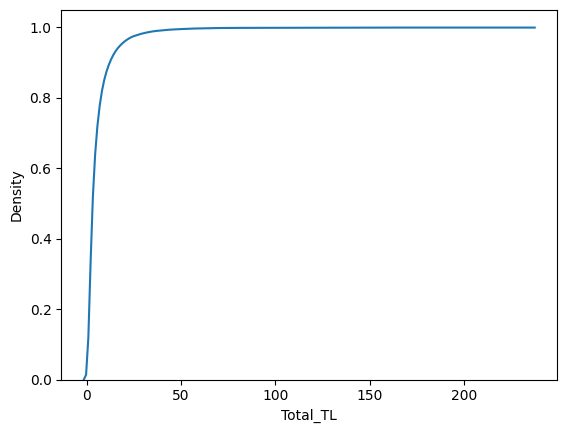

In [ ]:
sns.kdeplot(df['Total_TL'], cumulative = True)
plt.show()

In [ ]:
fig = px.box(x = df['Total_TL'])
fig.show()

In [ ]:
df[df['Total_TL']>=14] # the outliers seems like genuine data

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
20,29,42,34,8,2,2,0.048,0.048,0.190,0.810,...,0.000,0.0,0.000,0.00,1,1,HL,HL,740,P1
59,71,26,22,4,1,0,0.038,0.000,0.154,0.846,...,0.667,1.0,0.667,0.50,1,0,ConsumerLoan,ConsumerLoan,618,P4
81,98,23,14,9,3,3,0.130,0.130,0.391,0.609,...,0.000,0.0,0.000,0.00,1,0,ConsumerLoan,ConsumerLoan,697,P2
101,125,26,26,0,0,0,0.000,0.000,0.000,1.000,...,0.000,0.0,0.000,0.00,1,0,others,others,746,P1
124,151,15,12,3,14,12,0.933,0.800,0.200,0.800,...,0.000,0.0,0.000,0.00,1,0,others,others,682,P2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42000,51261,47,42,5,3,0,0.064,0.000,0.106,0.894,...,0.000,0.0,0.000,0.00,1,0,others,others,721,P1
42021,51283,42,30,12,3,1,0.071,0.024,0.286,0.714,...,0.500,1.0,0.071,0.25,1,0,CC,PL,736,P1
42052,51322,24,15,9,6,5,0.250,0.208,0.375,0.625,...,0.000,0.5,0.000,0.50,1,0,ConsumerLoan,others,678,P2
42055,51325,15,12,3,1,0,0.067,0.000,0.200,0.800,...,1.000,0.0,1.000,0.00,1,1,PL,others,718,P1


In [ ]:
df[df['Total_TL']>=14]['Approved_Flag'].value_counts()

,count
Approved_Flag,
P2,1567
P1,1103
P4,403
P3,372


# EDA - Bivarite Analaysis

In [ ]:
numerical_df =   df.select_dtypes(include = 'number').iloc[:,1:]
numerical_df['Approved_Flag'] = df['Approved_Flag']

categorical_df = df.select_dtypes(exclude = 'number').iloc[:,:-1]
categorical_df['Approved_Flag'] = df['Approved_Flag']

In [ ]:
numerical_df.head()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score,Approved_Flag
0,5,4,1,0,0,0.000,0.0,0.200,0.800,0,...,0,1,0.0,0.0,0.000,0.0,1,0,696,P2
1,1,0,1,0,0,0.000,0.0,1.000,0.000,1,...,0,0,0.0,0.0,0.000,0.0,0,0,685,P2
2,8,0,8,1,0,0.125,0.0,1.000,0.000,2,...,0,0,0.0,0.0,0.000,0.0,1,0,693,P2
3,3,2,1,0,0,0.000,0.0,0.333,0.667,0,...,0,0,0.0,0.0,0.000,0.0,0,0,753,P1
4,6,5,1,0,0,0.000,0.0,0.167,0.833,0,...,0,0,1.0,0.0,0.429,0.0,1,0,668,P3


In [ ]:
categorical_df.head()

,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,Married,12TH,M,PL,PL,P2
1,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,Married,SSC,M,ConsumerLoan,others,P2
3,Married,POST-GRADUATE,M,AL,AL,P1
4,Married,12TH,M,ConsumerLoan,PL,P3


## 1.Numerical features

- Let's check whether there is any association b/w feature(numerical) & target variable(categorical) using One Way ANOVA

### a.ANOVA(One way) Test

- **Null Hypothesis (Ho):** The mean values of the feature fi are the same across all classes of the target variable i.e. the feature fi does not contribute to distinguishing between classes in  target variable.

- **Alternate Hypothesis (Ha):** At least one class mean is significantly different from the others, meaning all groups don't have same average value, so the feature might help in distinguish between them between classes in target variable.


- **If p-value < significance level (eg. 0.05):** Reject Ho,This means that the feature(numerical) has a strong impact in separating different classes and is useful for predicting the target variable

- **If p-value > significance level:** Fail to reject Ho, This means that the feature(numerical) doesn't have a strong impact in separating the classes, so it is not be useful for predicting the target variable.

In [ ]:
numerical_df['Approved_Flag'].unique()

array(['P2', 'P1', 'P3', 'P4'], dtype=object)

In [ ]:
from scipy.stats import f_oneway

associated_num_cols = []

for col in numerical_df.columns[:-1]:

    group_p1 = numerical_df[numerical_df['Approved_Flag'] == 'P1'][col].values
    group_p2 = numerical_df[numerical_df['Approved_Flag'] == 'P2'][col].values
    group_p3 = numerical_df[numerical_df['Approved_Flag'] == 'P3'][col].values
    group_p4 = numerical_df[numerical_df['Approved_Flag'] == 'P4'][col].values

    f_stat, p_value = f_oneway(group_p1, group_p2, group_p3, group_p4)

    if p_value <= 0.01:
       associated_num_cols.append(col)


In [ ]:
unassociated_features = list(np.setdiff1d(numerical_df.columns[:-1], associated_num_cols))

print("Features NOT associated with Approved_Flag:", unassociated_features)

# Number of doubtful payments in last 6 months
# Number of loss accounts in last 12 months
# Number of loss accounts in last 6 months
# Number of sub standard payments in last 6 months
# Percent current balance of all accounts

Features NOT associated with Approved_Flag: ['num_dbt_6mts', 'num_lss_12mts', 'num_lss_6mts', 'num_sub_6mts', 'pct_currentBal_all_TL']


## 2.Categorical features

### a.Chi-Square Test

In [ ]:
categorical_df.columns[:-1]

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2'],
      dtype='object')

In [ ]:
# Let's check whether there is any association b/w feature(categorical) & target variable(categorical) using One Way ANOVA

In [ ]:
from scipy.stats import chi2_contingency

# Ho : There is no association b/w feature(categorical) and Target Variable(Approved Flag)
# Ha : There is an association b/w feature(categorical) and Target Variable(Approved Flag)

associated_cat_cols = []

for i in categorical_df.columns[:-1]:

    contingency_table = pd.crosstab(categorical_df['Approved_Flag'], categorical_df[i])

    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

    alpha = 0.01

    if p_value < alpha: # Reject the Null Hypothesis. There is no association b/w feature(categorical) and Target Variable(Approved Flag)

       associated_cat_cols.append(i)

    else: # Fail to reject the Null Hypothesis. There is an association b/w feature(categorical) and Target Variable(Approved Flag)
       continue


In [ ]:
associated_cat_cols

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

- Let's check the strength of association b/w feature(categorical) and Target Variable(Approved Flag)

### b.Cramer's V Test - Strength of association

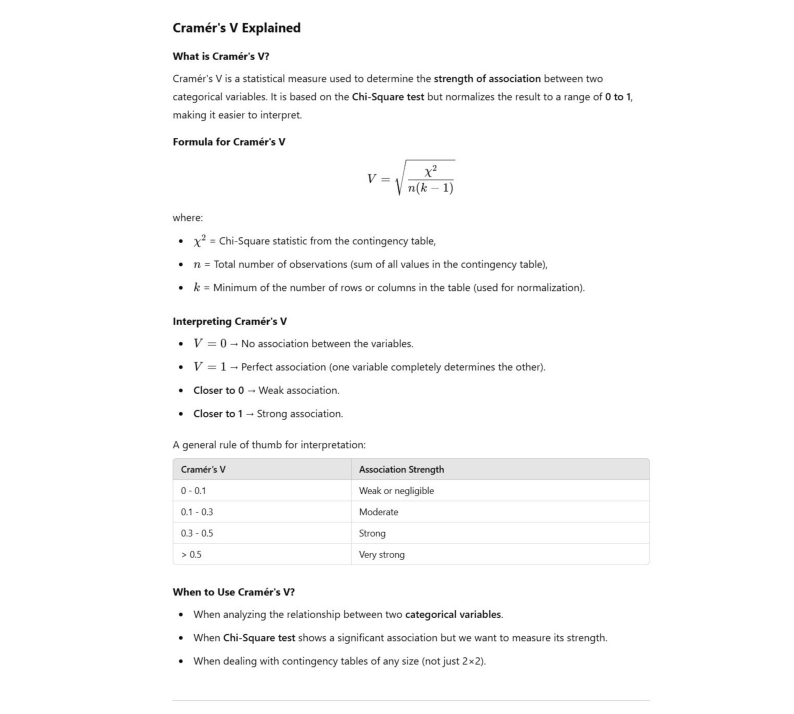

In [ ]:
import cv2

# Load image
image_path = "/content/cramer V.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Set figure size
plt.figure(figsize=(10, 12))  # Increase figure size
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
crammer_v_dict = dict()

for i in associated_cat_cols:

    contingency_table = pd.crosstab(df['Approved_Flag'], categorical_df[i])

    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()

    k = min(contingency_table.shape)

    cramers_v = np.sqrt( (chi2_stat / (n * (k - 1))) )

    crammer_v_dict[i] = [np.round(p_value,4), np.round(cramers_v,4)]



In [ ]:
cramer_df = pd.DataFrame(crammer_v_dict.values(), columns = ['p_value', 'crammer_v_value'])

cramer_df.insert(0, 'feature', crammer_v_dict.keys())

cramer_df.sort_values(by = 'crammer_v_value', ascending = False).reset_index(drop = True, inplace = True)

cramer_df

,feature,p_value,crammer_v_value
0,MARITALSTATUS,0.0,0.1600
1,EDUCATION,0.0,0.0386
2,GENDER,0.0,0.0242
3,last_prod_enq2,0.0,0.1392
4,first_prod_enq2,0.0,0.1049


In [ ]:
def find_assoication(x):

    if x >= 0 and x < 0.1:
       return 'Week / Negligible'

    elif x >= 0.1 and x < 0.3:
       return 'Moderate'

    elif x >= 0.3 and x < 0.5:
       return 'Strong'

    elif x > 0.5:
       return 'Very Strong'


cramer_df['association_nature_with_Approved_Flag'] = cramer_df['crammer_v_value'].apply(find_assoication)

cramer_df

,feature,p_value,crammer_v_value,association_nature_with_Approved_Flag
0,MARITALSTATUS,0.0,0.1600,Moderate
1,EDUCATION,0.0,0.0386,Week / Negligible
2,GENDER,0.0,0.0242,Week / Negligible
3,last_prod_enq2,0.0,0.1392,Moderate
4,first_prod_enq2,0.0,0.1049,Moderate


- If Cramer's V value is close to 0, the association is weak.
- If Cramer's V value is close to 1, the association is strong.

## 3.How to encode Categorical features

- **Q. What to use for Encoding Categorical variable ? Ordinal Encoding vs One Hot Encoding**

In [ ]:
categorical_df.columns

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2', 'Approved_Flag'],
      dtype='object')

In [ ]:
for i in categorical_df.columns:

    print(f"{i}:, {categorical_df[i].unique()}", end = '\n\n')


MARITALSTATUS:, ['Married' 'Single']

EDUCATION:, ['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']

GENDER:, ['M' 'F']

last_prod_enq2:, ['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']

first_prod_enq2:, ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']

Approved_Flag:, ['P2' 'P1' 'P3' 'P4']



### 1.MARITALSTATUS

In [ ]:
matrix = pd.crosstab(df['MARITALSTATUS'], df['Approved_Flag'])
matrix

Approved_Flag,P1,P2,P3,P4
MARITALSTATUS,,,,
Married,4435,18719,4387,3346
Single,473,6735,2053,1918


In [ ]:
temp1 = (matrix['P1'] + matrix['P2']) / matrix.sum(axis = 1)

temp1 = temp1.sort_values(ascending=False).reset_index().rename(columns = {0:'priority_ratio'})

temp2  = df['MARITALSTATUS'].value_counts().reset_index().rename(columns = {'count':'num_applicants'})

final_df = temp2.merge(temp1, on = 'MARITALSTATUS', how = 'inner')

final_df

,MARITALSTATUS,num_applicants,priority_ratio
0,Married,30887,0.749636
1,Single,11179,0.644780


- Yes! Marital Status affects loan approval probability in an ordered way:
- Married -> Higher approval chances
- Single -> Lower approval chances

**But this can also means that single person that apply for loan
would be less as comparsion to married ones ?**

- Married applicants are nearly 3 times more than Single applicants.
- This means:
 - Fewer Single applicants apply for loans (which could explain lower approvals).
 - Married applicants dominate the dataset, so their approvals appear much higher.
 - **This does not necessarily mean banks only prefer Married applicants**
 - The lower loan approval numbers for Single applicants could just be due to fewer applications, not because banks strongly prefer Married applicants.

In [ ]:
cramer_df[cramer_df['feature'] == 'MARITALSTATUS']

,feature,p_value,crammer_v_value,association_nature_with_Approved_Flag
0,MARITALSTATUS,0.0,0.16,Moderate


 - **There is no inherent ordinal order in MARITAL STATUS.**

 - Final Decision: Use One-Hot Encoding (OHE) on MARITALSTATUS instead of Ordinal Encoding.


### 2.EDUCATION

In [ ]:
matrix = pd.crosstab(df['EDUCATION'], df['Approved_Flag'])
matrix

Approved_Flag,P1,P2,P3,P4
EDUCATION,,,,
12TH,1191,7326,1881,1305
GRADUATE,1766,8268,2136,1972
OTHERS,310,1401,327,253
POST-GRADUATE,304,1114,251,229
PROFESSIONAL,44,130,31,14
SSC,761,4518,1104,858
UNDER GRADUATE,532,2697,710,633


In [ ]:
temp1 = df['EDUCATION'].value_counts().reset_index().rename(columns = {'count':'num_of_applicants'})

temp1['overall%'] = (temp1['num_of_applicants'] / temp1['num_of_applicants'].sum())*100

temp2 = (matrix['P1'] + matrix['P2']) / matrix.sum(axis = 1)

temp2 = temp2.sort_values(ascending=False).reset_index().rename(columns = {0:'priority_ratio'})

final_df = temp1.merge(temp2, on = 'EDUCATION', how = 'inner').sort_values(by='priority_ratio', ascending = False).reset_index(drop = True)

final_df


,EDUCATION,num_of_applicants,overall%,priority_ratio
0,PROFESSIONAL,219,0.520610,0.794521
1,POST-GRADUATE,1898,4.511957,0.747102
2,OTHERS,2291,5.446204,0.746835
3,SSC,7241,17.213427,0.729043
4,12TH,11703,27.820568,0.727762
5,GRADUATE,14142,33.618599,0.709518
6,UNDER GRADUATE,4572,10.868635,0.706255


- Education is in grey area for applying Ordrinal encoding

- If Priority approvals increase with EDUCATION level this means bank favours loan based on EDUCATION level.
- If higher education levels systematically get more approvals, it suggests an ordinal structure.
- But in this data there is no clear ordinal pattern in the priority ratio based on EDUCATION level.


**But we believe banks generally prefer applicants with higher education levels.**

- Higher education generally correlates with better financial stability and repayment ability, so banks might prefer more educated applicants.

However, the data doesn't fully support this assumption because:

1. The priority ratio is not strictly increasing with education level.
 - Professional & Post-Graduate applicants have high ratios ✅
 - But SSC is ranked above 12TH & GRADUATE, which contradicts expectations. ❌

2. Other factors might have stronger influence than education alone.
 - A high-school graduate with a stable high-income job may be preferred over an unemployed postgraduate.

3. Low applicant numbers in certain categories (like Professional) can skew priority ratios.
 - Professional applicants have only 219 people, making the ratio unstable.

**OBSERVATION -**

- Professional and Postgraduate applicants have the highest priority ratio, which makes sense.
- However, SSC (Secondary School Certificate) holders have a higher priority ratio than 12th-grade and even graduates, which is unexpected.
- Similarly, 12th-grade holders are prioritized more than graduates, which contradicts the assumption that higher education always leads to better loan approvals.

**CONCLUSION -**
- **There is no clear Ordinal pattern between education level and loan approval priority.**
- Since the order does not strictly align with priority level in APPROVED_FLAG, Ordinal Encoding is not suitable.
- **If the order does not align well with the target variable, using Ordinal Encoding can mislead the model.**
- In such cases, One-Hot Encoding (OHE) is safer.
- **It is a better choice to let the model decide the relationship without imposing a misleading order.**

In [ ]:
cramer_df[cramer_df['feature'] == 'EDUCATION']

,feature,p_value,crammer_v_value,association_nature_with_Approved_Flag
1,EDUCATION,0.0,0.0386,Week / Negligible


The Chi-Square test checks whether there is a significant association between two categorical variables in this case, EDUCATION and Approved_Flag (loan approval priority).

**Q. Why did the Chi-Square test find a significant association?**

1. Education level does impact loan approval priority.
 - The distribution of approvals across education levels is not random; some education levels have higher priority approvals than others.
 - This means banks do consider education when deciding loan priority, but not in a strictly ordinal way (e.g., Graduates do not always get higher priority than 12th pass).

2. **Significant association # clear ordering**
 - The Chi-Square test only tells us whether a relationship exists, not whether it's linear or ordered.
 - While education affects approval, it does not follow a consistent increasing or decreasing trend that would justify Ordinal Encoding.

3. Key takeaway
 - Chi-Square detects a dependency, so education level does influence loan approval priority.
 - **However, since the relationship doesn't follow a strict order, One-Hot Encoding is still the better choice over Ordinal Encoding.**

### 3.GENDER

In [ ]:
matrix = pd.crosstab(df['GENDER'], df['Approved_Flag'])

temp1 = (matrix['P1'] + matrix['P2']) / matrix.sum(axis = 1)

temp1 = temp1.sort_values(ascending=False).reset_index().rename(columns = {0:'priority_ratio'})

temp2 = df['GENDER'].value_counts().reset_index().rename(columns = {'count':'num_of_applicants'})

final_df = temp2.merge(temp1, on = 'GENDER', how = 'inner')

final_df


,GENDER,num_of_applicants,priority_ratio
0,M,37346,0.722005
1,F,4720,0.719915


1. Males and females have nearly identical priority ratios (~72%)
 - Males: 0.722
 - Females: 0.720
 - The difference is minimal, meaning gender does not play a significant role in loan approval priority.

2. The number of male applicants is much higher (37,346 vs. 4,720 females)
 - Even though more men apply, their approval distribution is similar to females.
 - This suggests that banks do not strongly favor one gender over another when deciding priority.

In [ ]:
cramer_df[cramer_df['feature'] == 'GENDER']

,feature,p_value,crammer_v_value,association_nature_with_Approved_Flag
2,GENDER,0.0,0.0242,Week / Negligible


### 4.last_prod_enq2

In [ ]:
matrix = pd.crosstab(df['last_prod_enq2'], df['Approved_Flag'])

temp1 = (matrix['P1'] + matrix['P2']) / matrix.sum(axis = 1)

temp1 = temp1.sort_values(ascending=False).reset_index().rename(columns = {0:'priority_ratio'})

temp2 = df['last_prod_enq2'].value_counts().reset_index().rename(columns = {'count':'num_of_applicants'})

final_df = temp2.merge(temp1, on = 'last_prod_enq2', how = 'inner').sort_values(by = 'priority_ratio', ascending = False).reset_index(drop = True)

final_df


,last_prod_enq2,num_of_applicants,priority_ratio
0,HL,830,0.901205
1,AL,1353,0.866962
2,others,13655,0.830978
3,CC,2195,0.739408
4,PL,7553,0.666093
5,ConsumerLoan,16480,0.633495


In [ ]:
cramer_df[cramer_df['feature'] == 'last_prod_enq2']

,feature,p_value,crammer_v_value,association_nature_with_Approved_Flag
3,last_prod_enq2,0.0,0.1392,Moderate


### 5.first_prod_enq2

In [ ]:
cramer_df[cramer_df['feature'] == 'first_prod_enq2']

,feature,p_value,crammer_v_value,association_nature_with_Approved_Flag
4,first_prod_enq2,0.0,0.1049,Moderate


- **Hence it's decided that all the categorical features should be encoded using One Hot Encoding**